In [5]:
import pandas as pd

df = pd.read_csv('Student Attitude and Behavior (Final).csv')
df.head()


,Student_ID,Gender,Height_cm,Weight_kg,Eleventh_Grade_GPA,Twelfth_Grade_GPA,College_GPA,Certification_Course,Hobbies,Daily_Study_Time_mins,Preferred_Study_Time,Salary_Expectation,Likes_Degree,Social_Media_Use_mins,Commute_Time_mins,Stress_Level,Financial_Status,Part_Time_Job,Average_GPA
0,1,Male,100.0,58.0,3.224490,2.723404,3.20,No,Video Games,188.015592,Morning,40000,No,95,13.846239,2,2,No,3.049298
1,2,Female,90.0,40.0,2.857143,3.404255,2.80,No,Cinema,136.774800,Morning,15000,Yes,65,49.567665,2,2,No,3.020466
2,3,Male,159.0,78.0,2.897959,2.595745,2.20,Yes,Cinema,124.784457,No preference,13000,Yes,140,22.678964,1,2,No,2.564568
3,4,Female,147.0,20.0,2.857143,2.510638,2.32,Yes,Reading books,11.099660,No preference,1500000,No,90,88.312123,2,3,No,2.562594
4,5,Male,170.0,54.0,1.632653,2.765957,1.20,No,Video Games,30.000000,Morning,50000,Yes,115,145.197910,3,3,No,1.866204


In [7]:
#how many students prefer to study at night?
night_prefer = df[df['Preferred_Study_Time'] == 'Night']
#new data frame that contains only students who prefer night study

#count, return number of items in df
night_count = len(night_prefer)

night_count


47

In [8]:
#students who spend at least 90 minutes
social_90 = df[df['Social_Media_Use_mins'] >= 90]

#students that work a part time job
part_time = df[df['Part_Time_Job'] == 'Yes']

#students that spend at least 90 minutes & work part time
social_part = pd.merge(social_90, part_time)

social_part_count = len(social_part)

social_part_count



13

In [9]:
hobbies_stress = df.groupby('Hobbies')['Stress_Level'].mean()

lowest_stress_hobby = hobbies_stress.idxmin()

lowest_stress_level = hobbies_stress.min()

print(lowest_stress_hobby)
print(lowest_stress_level)

Cinema
2.5128205128205128


In [21]:
df['Median_GPA'] = df[['Eleventh_Grade_GPA', 'Twelfth_Grade_GPA', 'College_GPA']].median(axis=1)
highest_median_student = df.loc[df['Median_GPA'].idxmax(), ['Student_ID', 'Median_GPA']]
print(highest_median_student)

highest_median_student['Median_GPA'] = round(highest_median_student['Median_GPA'], 3)
print(highest_median_student)

Student_ID         225
Median_GPA    3.959184
Name: 224, dtype: object
Student_ID      225
Median_GPA    3.959
Name: 224, dtype: object


Correlation between Commute Time and College GPA: -0.7050991957121665


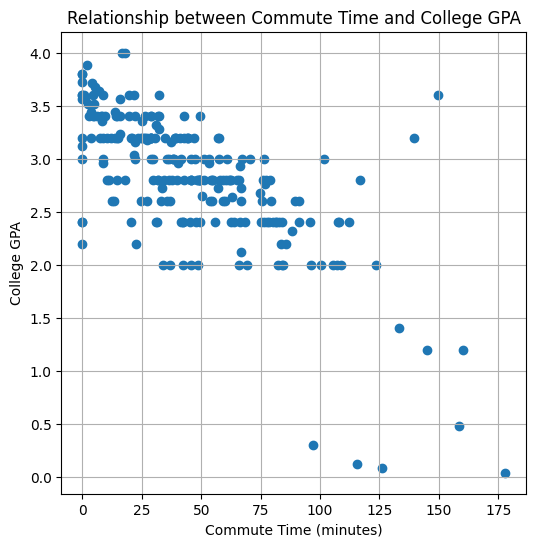

In [34]:
import matplotlib.pyplot as plt

correlation = df['Commute_Time_mins'].corr(df['College_GPA'])

print(f"Correlation between Commute Time and College GPA: {correlation}")

plt.figure(figsize=(6,6))
plt.scatter(df['Commute_Time_mins'], df['College_GPA'])
plt.xlabel('Commute Time (minutes)')
plt.ylabel('College GPA')
plt.title('Relationship between Commute Time and College GPA')
plt.grid(True)
plt.show()


Correlation between Commute Time and Average GPA: -0.6210329021105367


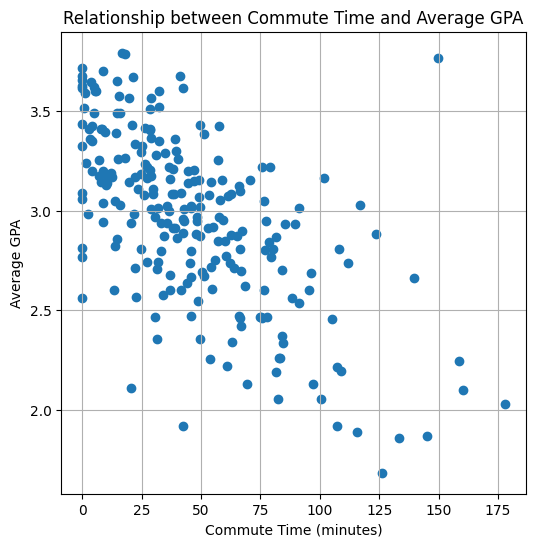

In [33]:
import matplotlib.pyplot as plt

correlation = df['Commute_Time_mins'].corr(df['Average_GPA'])

print(f"Correlation between Commute Time and Average GPA: {correlation}")

plt.figure(figsize=(6,6))
plt.scatter(df['Commute_Time_mins'], df['Average_GPA'])
plt.xlabel('Commute Time (minutes)')
plt.ylabel('Average GPA')
plt.title('Relationship between Commute Time and Average GPA')
plt.grid(True)
plt.show()

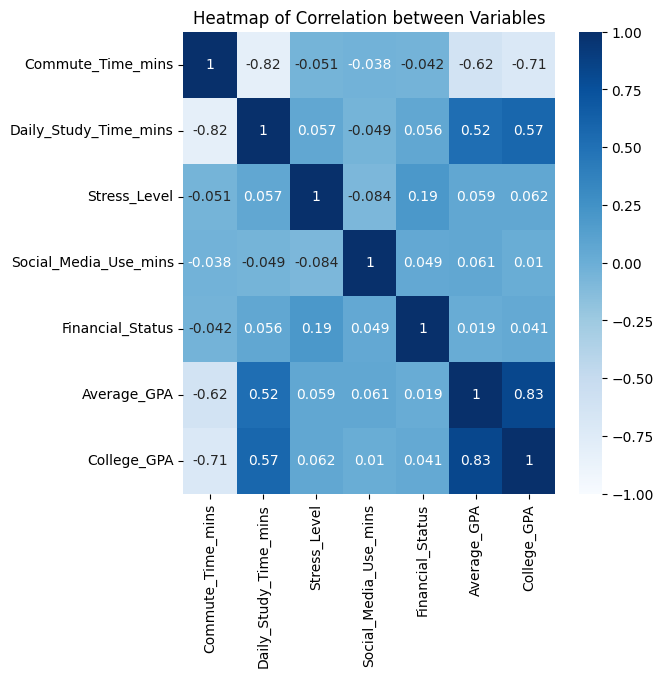

In [32]:
import seaborn as sns
variables = ['Commute_Time_mins', 'Daily_Study_Time_mins', 'Stress_Level',
             'Social_Media_Use_mins', 'Financial_Status', 'Average_GPA', 'College_GPA']

correlation_matrix = df[variables].corr()

plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation between Variables')

plt.show()

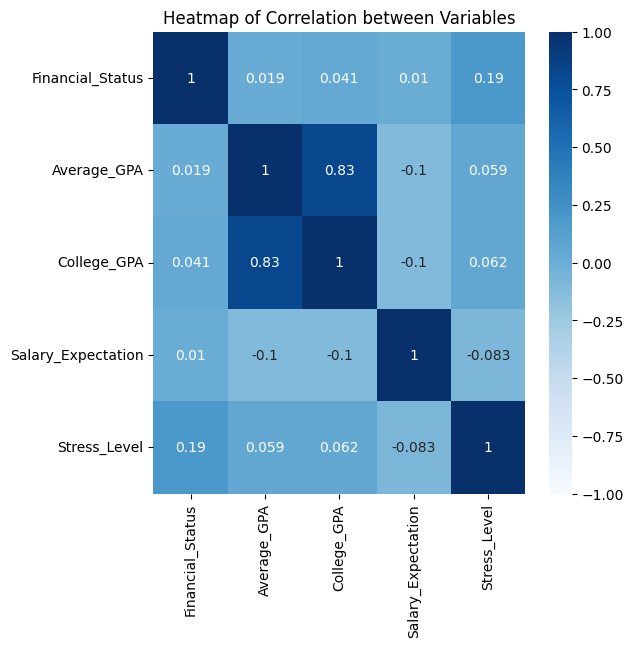

In [30]:
import seaborn as sns
variables = ['Financial_Status', 'Average_GPA', 'College_GPA', 'Salary_Expectation', 'Stress_Level']

correlation_matrix = df[variables].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation between Variables')

plt.show()

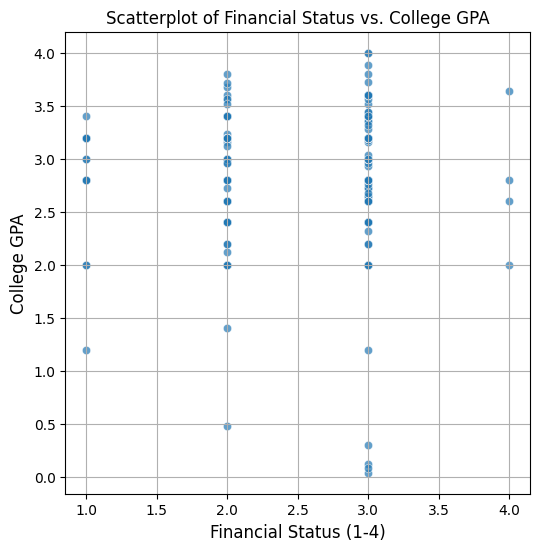

In [31]:


df = pd.read_csv('Student Attitude and Behavior (Final).csv')

df['Financial_Status'] = pd.to_numeric(df['Financial_Status'], errors='coerce')
df['College_GPA'] = pd.to_numeric(df['College_GPA'], errors='coerce')

df = df.dropna(subset=['Financial_Status', 'College_GPA'])

plt.figure(figsize=(6, 6))

sns.scatterplot(data=df, x='Financial_Status', y='College_GPA', alpha=0.7)

plt.title('Scatterplot of Financial Status vs. College GPA', fontsize=12)
plt.xlabel('Financial Status (1-4)', fontsize=12)
plt.ylabel('College GPA', fontsize=12)

plt.grid(True)

plt.show()


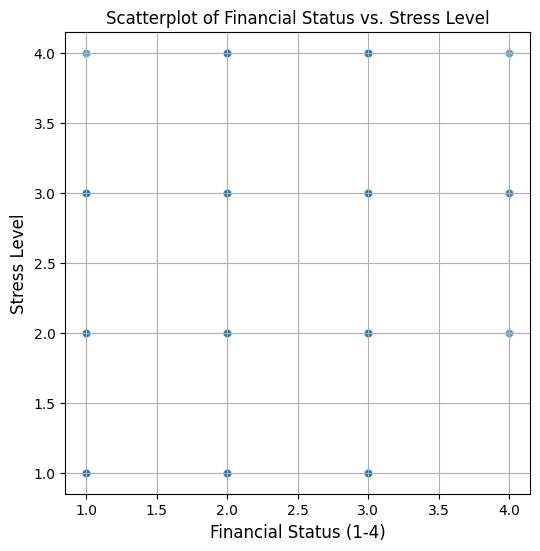

In [35]:


df['Financial_Status'] = pd.to_numeric(df['Financial_Status'], errors='coerce')
df['College_GPA'] = pd.to_numeric(df['College_GPA'], errors='coerce')

df = df.dropna(subset=['Financial_Status', 'Stress_Level'])

plt.figure(figsize=(6, 6))

sns.scatterplot(data=df, x='Financial_Status', y='Stress_Level', alpha=0.7)

plt.title('Scatterplot of Financial Status vs. Stress Level', fontsize=12)
plt.xlabel('Financial Status (1-4)', fontsize=12)
plt.ylabel('Stress Level', fontsize=12)

plt.grid(True)

plt.show()
